## EXPERIMENT 1.1: AdaFace

In [2]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [3]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_1_1/'


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [4]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/1.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_baseline1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/1.1/similarity_scores_adults_bibel_cropped_resized_retina_baseline1.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)



# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [5]:
sim_mat_c.shape

(7571, 7571)

# Finding the right threshold

In [5]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.0
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.3806203344713847
GARBE result, GARBE close to 1 means more unfair:  0.2854652508535385
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.3634407890381942
GARBE result, GARBE close to 1 means more unfair:  0.2725805917786457
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.32035354561551194
GARBE result, GARBE close to 1 means more unfair:  0.24026515921163394
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.27249947924962936
GARBE result, GARBE close to 1 means more unfair:  0.20437460943722202
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND result:  0.029739587017866557
GARBE result, GARBE close to 1

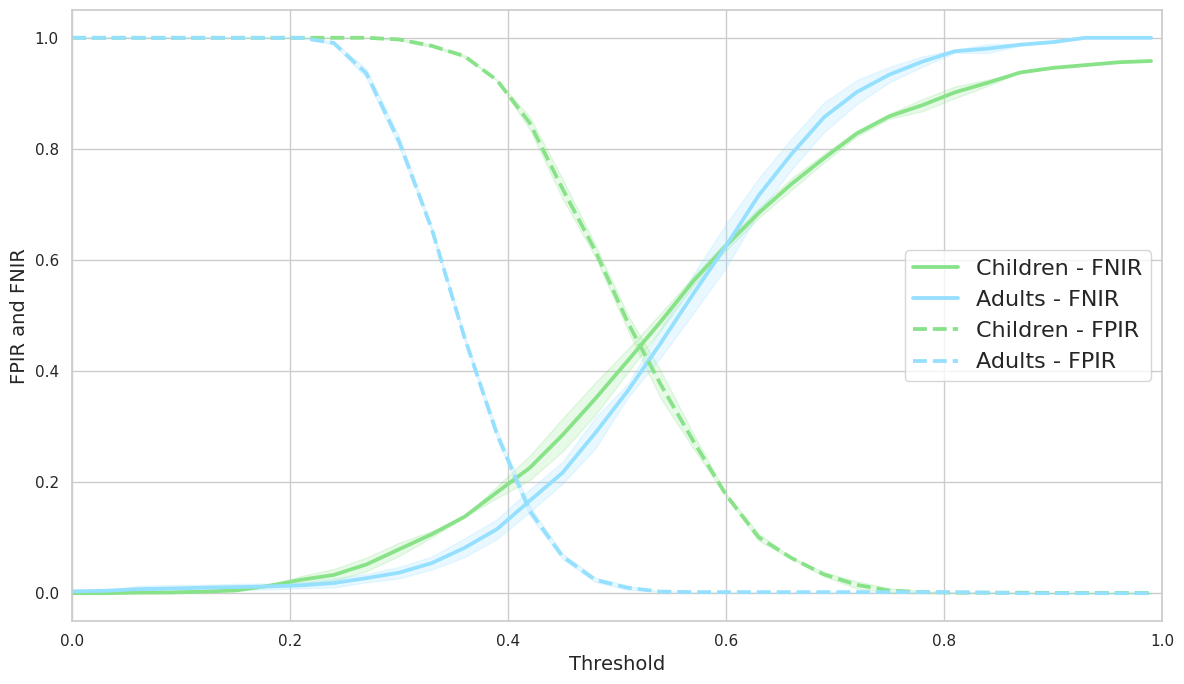

In [7]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x,  'AdaFace ex. 1.1', save_fig_path)


# Stats

In [6]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.270#df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.33628482659364145
FND result:  0.1513528819216486
GARBE result, GARBE close to 1 means more unfair:  0.19758586808964682
done
FPD result:  0.4959567356443676
FND result:  0.16186688434960894
GARBE result, GARBE close to 1 means more unfair:  0.2453893471732986
done
FPD result:  0.36245269777566147
FND result:  0.18357505874013139
GARBE result, GARBE close to 1 means more unfair:  0.22829446849901391
done
FPD result:  0.41682660296181756
FND result:  0.12316229479330681
GARBE result, GARBE close to 1 means more unfair:  0.1965783718354345
done
FPD result:  0.3317983196897034
FND result:  0.15457138329900177
GARBE result, GARBE close to 1 means more unfair:  0.19887811739667718
done
FPD result:  0.449491628188396
FND result:  0.11408530163010427
GARBE result, GARBE close to 1 means more unfair:  0.1979368832696772
done
FPD result:  0.4032283306027271
FND result:  0.18066303482037474
GARBE result, GARBE close to 1 means more unfair:  0.23630435876596284
done
FPD result:  0.

/tmp/ipykernel_2935/4152295398.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.051,0.025,1.000,0.936,0.423,0.175,0.237,0.270
std,3.028,0.005,0.005,0.000,0.008,0.069,0.044,0.040,0.000
min,1.000,0.045,0.018,1.000,0.925,0.332,0.114,0.197,0.270
25%,3.250,0.049,0.022,1.000,0.932,0.372,0.152,0.198,0.270
50%,5.500,0.050,0.023,1.000,0.935,0.410,0.171,0.232,0.270
75%,7.750,0.054,0.030,1.000,0.941,0.484,0.196,0.271,0.270
max,10.000,0.060,0.031,1.000,0.948,0.519,0.260,0.295,0.270


In [7]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.058 & 0.031 & 1.000 & 0.940 & 0.336 & 0.151 & 0.198 & 0.270 \\
\textbf{1} & 0.045 & 0.023 & 1.000 & 0.932 & 0.496 & 0.162 & 0.245 & 0.270 \\
\textbf{2} & 0.049 & 0.023 & 1.000 & 0.948 & 0.362 & 0.184 & 0.228 & 0.270 \\
\textbf{3} & 0.051 & 0.031 & 1.000 & 0.931 & 0.417 & 0.123 & 0.197 & 0.270 \\
\textbf{4} & 0.055 & 0.029 & 1.000 & 0.945 & 0.332 & 0.155 & 0.199 & 0.270 \\
\textbf{5} & 0.050 & 0.031 & 1.000 & 0.927 & 0.449 & 0.114 & 0.198 & 0.270 \\
\textbf{6} & 0.049 & 0.023 & 1.000 & 0.942 & 0.403 & 0.181 & 0.236 & 0.270 \\
\textbf{7} & 0.060 & 0.019 & 1.000 & 0.937 & 0.402 & 0.260 & 0.295 & 0.270 \\
\textbf{8} & 0.046 & 0.018 & 1.000 & 0.934 & 0.512 & 0.217 & 0.290 & 0.270 \\
\textbf{9} & 0.051 & 0.022 & 1.000 & 0.925 & 0.519 & 0.201 & 0.280 & 0.270 

/tmp/ipykernel_2935/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [8]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.051 & 0.025 & 1.000 & 0.936 & 0.423 & 0.175 & 0.237 & 0.270 \\
\textbf{std} & 0.005 & 0.005 & 0.000 & 0.008 & 0.069 & 0.044 & 0.040 & 0.000 \\
\textbf{min} & 0.045 & 0.018 & 1.000 & 0.925 & 0.332 & 0.114 & 0.197 & 0.270 \\
\textbf{25%} & 0.049 & 0.022 & 1.000 & 0.932 & 0.372 & 0.152 & 0.198 & 0.270 \\
\textbf{50%} & 0.050 & 0.023 & 1.000 & 0.935 & 0.410 & 0.171 & 0.232 & 0.270 \\
\textbf{75%} & 0.054 & 0.030 & 1.000 & 0.941 & 0.484 & 0.196 & 0.271 & 0.270 \\
\textbf{max} & 0.060 & 0.031 & 1.000 & 0.948 & 0.519 & 0.260 & 0.295 & 0.270 \\
\bottomrule
\end{tabular} 
\end{table}



/tmp/ipykernel_2935/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [9]:
df_all_results.to_csv('df_all_results_ada_1_1.csv', index=False)


# Stats

In [10]:
import scipy.stats as stats

In [11]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 13.572111949104585
P-value: 2.6807918437607247e-07


# Gemmer simscores

In [ ]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


# Loader sim scores

In [12]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv')).values.flatten()


In [13]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [14]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,2.969943e+07
1,Minimum,-0.127076,-4.138602e-01
2,Maximum,0.952069,8.744552e-01
3,Mean,0.585216,1.418311e-02
4,St. Dev.,0.135483,8.727605e-02
5,Skewness,-0.537410,3.293416e-01
6,Ex. Kurtosis,1.495607,4.678001e-01


In [15]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,121256.000000,3.275105e+07
1,Minimum,0.030712,-3.562537e-01
2,Maximum,0.998967,9.998881e-01
3,Mean,0.583003,1.374232e-01
4,St. Dev.,0.151178,1.173985e-01
5,Skewness,-0.209160,3.989444e-01
6,Ex. Kurtosis,-0.022230,2.163939e-01


In [7]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

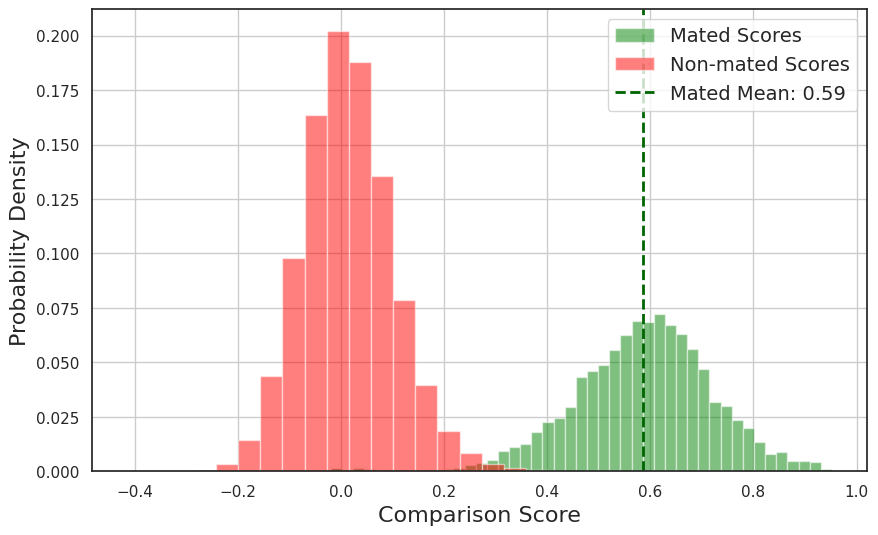

In [8]:


def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=16)
    plt.ylabel(ylabel, size=16)
    # plt.title(title, size=20)
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

    plt.savefig(f'{save_fig_path}{gem_som}.png')

    plt.show()



plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


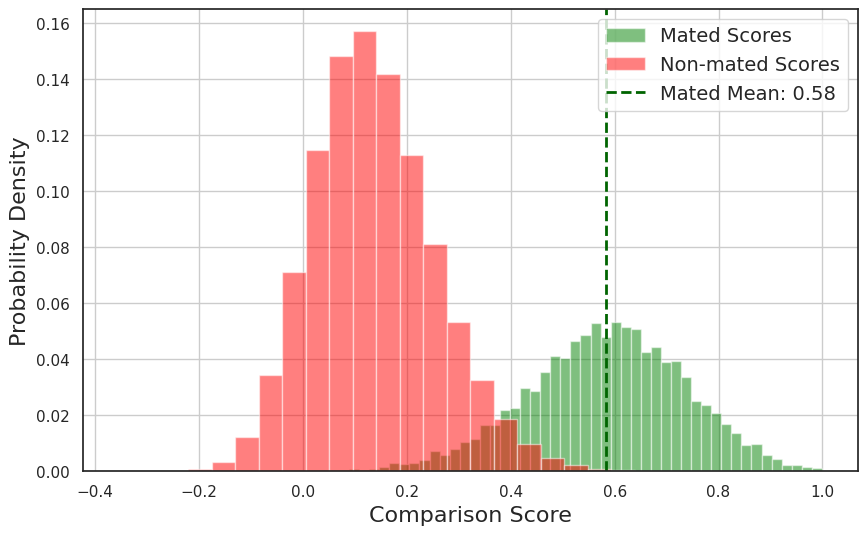

In [9]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som='C1')


# DET curves


In [10]:
from DET_utils.DET_plots import *

In [11]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 5.01097
d' adult = 3.29216


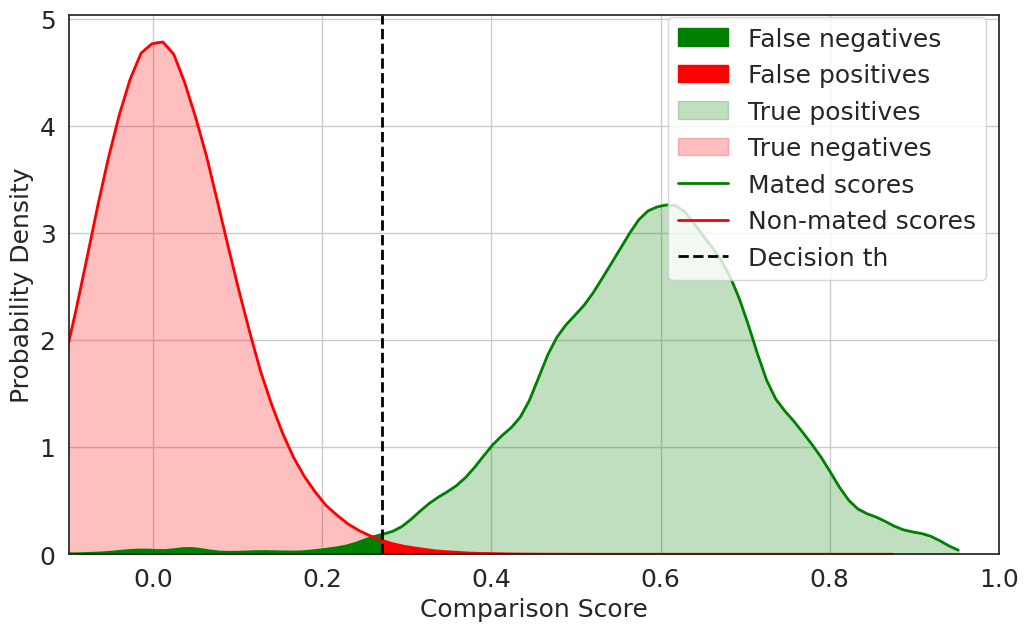

In [16]:

def kde_with_threshold(mated_scores, nonmated_scores, scores_type, threshold, savename=None, save_fig_path='save_fig_path' , title='title'):
    linspace_items = 101
    mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores, linspace_items)
    nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores, linspace_items)

    plt.figure(figsize=figure_size)
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel("Probability Density", size=label_fontsize)

    def compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items):
        if scores_type == "similarity":
            if mated_min < threshold:
                mated_shade = np.linspace(threshold, mated_max, linspace_items)
                mated_fill = np.linspace(mated_min, threshold, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_max > threshold:
                nonmated_shade = np.linspace(nonmated_min, threshold, linspace_items)
                nonmated_fill = np.linspace(threshold, nonmated_max, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        elif scores_type == "dissimilarity":
            if mated_max > threshold:
                mated_shade = np.linspace(mated_min, threshold, linspace_items)
                mated_fill = np.linspace(threshold, mated_max, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_min < threshold:
                nonmated_shade = np.linspace(threshold, nonmated_max, linspace_items)
                nonmated_fill = np.linspace(nonmated_min, threshold, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        else:
            raise ValueError(f"Unknown type of comparison scores: {scores_type}")
        return mated_shade, mated_fill, nonmated_shade, nonmated_fill

    plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
    plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)

    mated_shade, mated_fill, nonmated_shade, nonmated_fill = compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items)

    plt.fill_between(mated_shade, mated_kde(mated_shade), alpha=alpha_shade, color=mated_colour)
    plt.fill_between(nonmated_shade, nonmated_kde(nonmated_shade), alpha=alpha_shade, color=nonmated_colour)

    if mated_fill is not None:
        plt.fill_between(mated_fill, mated_kde(mated_fill), alpha=alpha_fill, color=mated_colour)
    if nonmated_fill is not None:
        plt.fill_between(nonmated_fill, nonmated_kde(nonmated_fill), alpha=alpha_fill, color=nonmated_colour)

    plt.axvline(threshold, linewidth=linewidth, linestyle=threshold_style, color=threshold_colour, label="Decision th")

    plt.legend(loc=0)
    red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_fill, label='False positives')
    green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_fill, label='False negatives')
    shaded_red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_shade, label='True negatives')
    shaded_green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_shade, label='True positives')
    current_handles, _ = plt.gca().get_legend_handles_labels()

    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize, handles=[green_patch, red_patch, shaded_green_patch, shaded_red_patch]+current_handles)
    plt.xlim(-0.1, 1)
    plt.ylim(0, None)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    plt.savefig(f'{save_fig_path}{title}_FN_FP.png')

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()

threshold1 = 0.27#df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

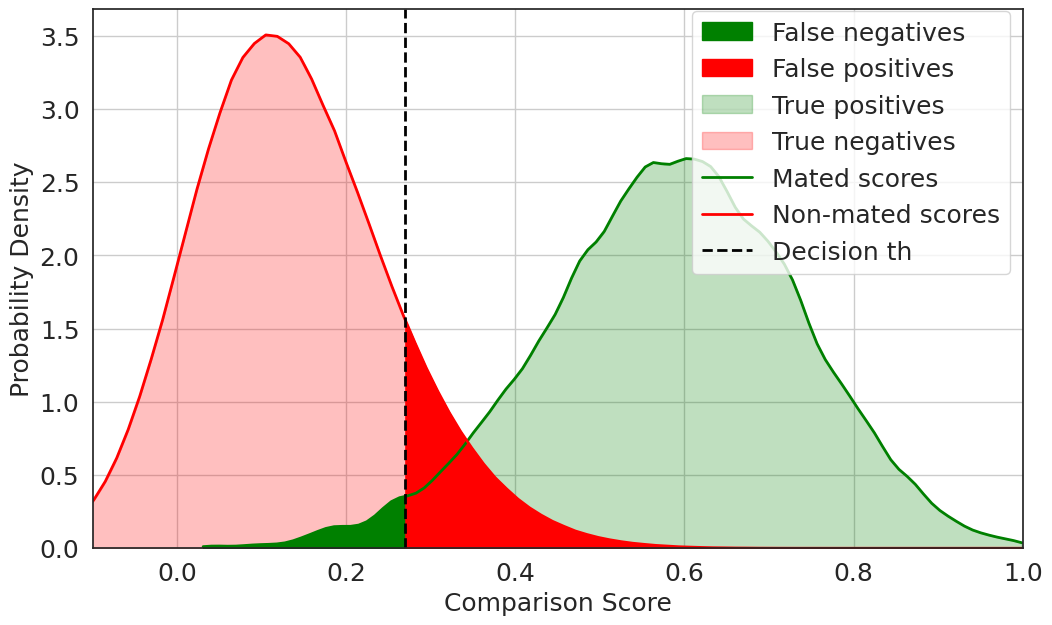

In [17]:
threshold2 = 0.27#df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

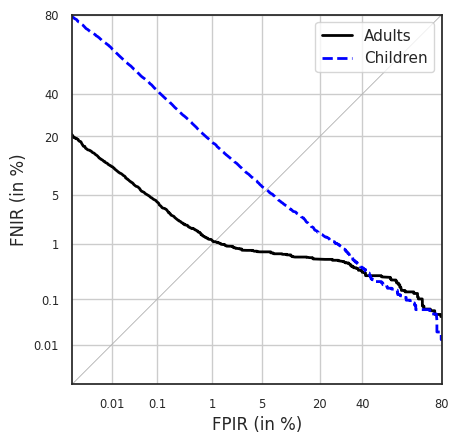

In [15]:




DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - AdaFace ex. 1.1', save_fig_path= save_fig_path)